In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

/home/hshan/venvs/api/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [22]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor

from sklearn.linear_model import HuberRegressor

In [15]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [16]:
raw_data = pd.read_csv('data/train_data_hs.csv',)

In [17]:
train_data = raw_data[~(raw_data.id%10).isin([3,5,7])]
vali_data = raw_data[(raw_data.id%10).isin([3,5,7])]

In [18]:
y_col = ['Target']

In [19]:
x_col = list(raw_data.columns)
x_col.remove('id')
x_col.remove('Target')

In [20]:
train_X = train_data[x_col]

In [21]:
train_y = train_data[y_col]

# single

In [47]:
# model = NGBRegressor(random_state = 2, verbose = 0)
# model = XGBRegressor(random_state = 2,)
# model = CatBoostRegressor(random_state = 2)
model = LGBMRegressor(random_state=2)

In [48]:
model.fit(train_X, train_y,)

LGBMRegressor(random_state=2)

In [49]:
test_data = vali_data.copy()

In [50]:
test_data['pred'] = model.predict(vali_data[x_col])

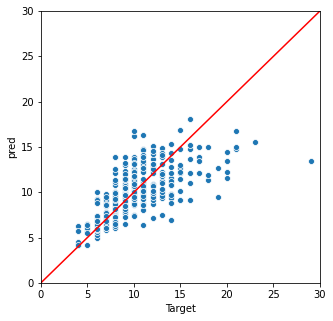

In [51]:
plt.figure(figsize = (5,5))
g1 = sns.scatterplot(data=test_data, x='Target', y='pred',)
g1.set_xlim([0, 30])
g1.set_ylim([0, 30])
sns.lineplot(x=[0, 30], y=[0, 30], color='red')

In [52]:
round(NMAE(test_data.Target, test_data.pred)*100, 3)

17.471

|종류|NMAE|
|---|---|
|NGB|16.797|
|XGB|18.343|
|CatBoost|16.765|
|LGBM|17.471|

# ensemble


In [54]:
test_data = vali_data.copy()

In [63]:
for md_name in ['NGB', 'XGB', 'CatB', 'LGBM']:
    if md_name == 'NGB':
        model = NGBRegressor(random_state = 2, verbose = 0)
    elif md_name == 'XGB':
        model = XGBRegressor(random_state = 2,)
    elif md_name == 'CatB':
        model = CatBoostRegressor(random_state = 2)
    elif md_name == 'LGBM':
        model = LGBMRegressor(random_state=2)
    
    model.fit(train_X, train_y)
    test_data[md_name] = model.predict(vali_data[x_col])

/home/hshan/venvs/api/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate set to 0.040103
0:	learn: 3.0801068	total: 1.69ms	remaining: 1.69s
1:	learn: 3.0394905	total: 3.05ms	remaining: 1.52s
2:	learn: 2.9984604	total: 4.24ms	remaining: 1.41s
3:	learn: 2.9588434	total: 5.53ms	remaining: 1.38s
4:	learn: 2.9211365	total: 6.71ms	remaining: 1.33s
5:	learn: 2.8818397	total: 7.89ms	remaining: 1.31s
6:	learn: 2.8474842	total: 9.08ms	remaining: 1.29s
7:	learn: 2.8151353	total: 10.3ms	remaining: 1.28s
8:	learn: 2.7866340	total: 11.5ms	remaining: 1.27s
9:	learn: 2.7559563	total: 12.8ms	remaining: 1.27s
10:	learn: 2.7273974	total: 13.9ms	remaining: 1.25s
11:	learn: 2.6997960	total: 14.9ms	remaining: 1.23s
12:	learn: 2.6731323	total: 15.9ms	remaining: 1.21s
13:	learn: 2.6496938	total: 16.9ms	remaining: 1.19s
14:	learn: 2.6220005	total: 17.9ms	remaining: 1.17s
15:	learn: 2.6014812	total: 18.9ms	remaining: 1.16s
16:	learn: 2.5837687	total: 19.9ms	remaining: 1.15s
17:	learn: 2.5632327	total: 20.8ms	remaining: 1.14s
18:	learn: 2.5460043	total: 21.7ms	remaining

337:	learn: 1.5137574	total: 174ms	remaining: 341ms
338:	learn: 1.5124649	total: 175ms	remaining: 341ms
339:	learn: 1.5105193	total: 175ms	remaining: 340ms
340:	learn: 1.5085205	total: 176ms	remaining: 340ms
341:	learn: 1.5071116	total: 176ms	remaining: 339ms
342:	learn: 1.5045230	total: 177ms	remaining: 338ms
343:	learn: 1.5038876	total: 177ms	remaining: 338ms
344:	learn: 1.5019025	total: 177ms	remaining: 337ms
345:	learn: 1.5013709	total: 178ms	remaining: 336ms
346:	learn: 1.4990618	total: 178ms	remaining: 336ms
347:	learn: 1.4972584	total: 179ms	remaining: 335ms
348:	learn: 1.4964383	total: 179ms	remaining: 334ms
349:	learn: 1.4958237	total: 180ms	remaining: 334ms
350:	learn: 1.4940680	total: 180ms	remaining: 333ms
351:	learn: 1.4916549	total: 180ms	remaining: 332ms
352:	learn: 1.4907491	total: 181ms	remaining: 332ms
353:	learn: 1.4902592	total: 181ms	remaining: 331ms
354:	learn: 1.4883287	total: 182ms	remaining: 330ms
355:	learn: 1.4876351	total: 182ms	remaining: 330ms
356:	learn: 

742:	learn: 1.0775073	total: 353ms	remaining: 122ms
743:	learn: 1.0764898	total: 354ms	remaining: 122ms
744:	learn: 1.0764140	total: 354ms	remaining: 121ms
745:	learn: 1.0754371	total: 355ms	remaining: 121ms
746:	learn: 1.0753690	total: 355ms	remaining: 120ms
747:	learn: 1.0749226	total: 355ms	remaining: 120ms
748:	learn: 1.0748856	total: 356ms	remaining: 119ms
749:	learn: 1.0739089	total: 356ms	remaining: 119ms
750:	learn: 1.0730261	total: 357ms	remaining: 118ms
751:	learn: 1.0724985	total: 357ms	remaining: 118ms
752:	learn: 1.0722093	total: 358ms	remaining: 117ms
753:	learn: 1.0708212	total: 358ms	remaining: 117ms
754:	learn: 1.0704368	total: 359ms	remaining: 116ms
755:	learn: 1.0689202	total: 359ms	remaining: 116ms
756:	learn: 1.0682951	total: 359ms	remaining: 115ms
757:	learn: 1.0682533	total: 360ms	remaining: 115ms
758:	learn: 1.0669936	total: 360ms	remaining: 114ms
759:	learn: 1.0661653	total: 361ms	remaining: 114ms
760:	learn: 1.0655098	total: 361ms	remaining: 113ms
761:	learn: 

In [65]:
test_data.head()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,F,I,M,NGB,XGB,CatB,LGBM
2,3,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,1,0,14.019091,15.455151,13.753710,15.043468
4,5,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,1,0,6.806661,8.165186,7.143905,6.849702
6,7,0.565,0.440,0.135,0.7680,0.3305,0.1385,0.2475,9,0,1,0,9.962424,9.461884,9.460275,9.910883
12,13,0.615,0.525,0.155,1.1375,0.3670,0.2360,0.3700,20,0,0,1,11.716415,11.865592,11.292967,12.247387
14,15,0.645,0.500,0.190,1.5595,0.7410,0.3715,0.3845,14,0,0,1,10.240998,9.539465,9.950172,9.610061


In [49]:
round(NMAE(test_data.Target, test_data.pred)*100, 3)

In [67]:
for md_name in ['NGB', 'XGB', 'CatB', 'LGBM']:
    print(md_name, round(NMAE(test_data['Target'], test_data[md_name])*100, 3))

NGB 16.81
XGB 18.343
CatB 16.765
LGBM 17.471


In [73]:
round(NMAE(test_data['Target'], (test_data[['NGB', 'XGB', 'CatB', 'LGBM']]).mean(axis=1))*100, 3)

16.883

* Basic

|종류|NMAE|
|---|---|
|NGB|16.81|
|XGB|18.343|
|CatB|16.765|
|LGBM|17.471|
|ensemble 4|16.883|